# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## Data Validation

The dataset comprises 7 columns and 947 rows of data.

- There are 52 missing values each in the 'calories,' 'carbohydrate,' 'protein,' and 'sugar' columns. Additionally, the 'high traffic' column contains 373 missing values.
- The 'serving' column presents a discrepancy. Despite being described as a numeric column, it contains strings attached to some values, and its data type is 'object.'
- Upon examination, the description table mentioned only 10 groupings in the category column. However, further inspection of the category column revealed the existence of 11 distinct groupings." Chicken Breast make up the 11th grouping


## Data Cleaning

- I replaced missing values in the 'high traffic' column with 'Low.' This decision was based on the description table's statement: 'if the traffic to the website was high when this recipe was shown, this is marked as 'High'' Considering this guideline, it is plausible that the missing values signify instances where a recipe may have driven low traffic to the site.
- The strings attached to certain values in the 'serving' column were removed, and subsequently, the data type was converted to 'int64' for consistency and numerical handling.
- The word 'Breast' was removed from 'Chicken Breast' to unify entries under 'Chicken,' aligning with the singular mention of 'Chicken' in the description table."
-After visualization, the 'calories,' 'carbohydrate,' 'protein,' and 'sugar' columns were filled with mean values using Simple Imputer. This approach aimed to ensure a more accurate representation of the data during visualization

## Exploratory Data Analysis
![Density_plot_of_calories](Density_plot_of_calories.png)

- The majority of the calories values fall within the range of 0 to 2000. The dataset exhibits a right skewness, and it contains outlier values

![heatmap](heatmap.png)

- The heatmap shows that there is a weak correlation between variables

![serving](serving.png)
- The serving size for recipes ranges between 1 and 6. Upon examination, no outliers were identified within the 'Serving' column.

## Model development
Before the model developement I did some preprocessing which include: 

- Removing outliers below 0.025 and above 0.0975
- Splitting data into train and test set
- Scaled data using StandardScaler
- Decolorate data using PCA

**This project is a classification problem and the targeted column is "High_traffic" column**

**Baseline model**
I fitted a LogisticRegression as baseline model beacuse it is easy to implement and it is use for binary classification

**Fitting comparison model**
I fitted GradientBoostingClassifier, DecisionTreeClassifier and RandomForestClassifier as the comparison model and RandomForestClassifier out performed the other two model so RandomForestClassifier is the final comparison model and will be compared to the baseline model.

**Model Evaluation**
Both baseline model and comparison model are evaluated on Accuracy, Precision and Recall score.

Comparing the LogisticRegression model and RandomForestClassifier based on accuracy, precision and recall score:

- Accuracy:

    - RandomForestClassifier (76.0%) has slightly higher accuracy compared to Logistic Regression (74.0%) i.e RandomForestClassifier was able to accuartely predict 76% of actual "High" which is positive class abd "Low" which is negative class
- Precision:

    - Both models have the same precision score (80.0%), indicating they have an equal ability to correctly identify positive cases when they make a positive prediction. this explain that out of the 76% actual predicted postive and negative class, 80% of them were positive class 
- Recall:

    - RandomForestClassifier (80.0%) has a higher recall compared to Logistic Regression (77.0%), This shows that the Random Forest model is better at capturing actual positive instances which is "High" from the dataset. with this recall score it show that RandomForestClassifier is able to correctly predict 80% of "High" traffic recipes in the website

## Definition of metrics for the business to monitor

**How should the business monitor what they want to achieve**
Tasty Bytes should continue iteratively in refining the prediction model based on insights gained from Accuracy, Precision and Recall score, with this Tasty Bytes can continuously improve their predictive capabilities and align them more closely with their goal of accurately identifying high-traffic recipes

**Estimate the initial values(s) for the metrics based on the current data**
The initial values for the metrics include: 
- Accuracy score 76%
- Precision score 80%
- Recall score 80%

## Recommendations
Calories is the number 1 important feature that drives high traffic to the website so recipe with calories of 450 and more should be listed on the website and recipe with low calories should be avoided.

Sugar, High sugar level in recipe doesn't drives high traffic to the website so category with high sugar should be avoided or the sugar in them sould be decrease into moderate amount.

An average serving of 3.5 drives high traffic so the business should take note of that.

Carbohydrate is also an important feature that drives high traffic to the site, an average 38grams of carbohydrate in recipe  will drive high traffic to the site so recipe with carbohydrate grams below 38 should be not be listed in the website or it shouldn't be listed often

Thank you.

# Import relevant libraries

In [109]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')
sns.set_style('darkgrid')
sns.set()

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

In [110]:
recipe_data = pd.read_csv("recipe_site_traffic_2212.csv", index_col='recipe')

recipe_data.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,NaN,NaN,NaN,NaN,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [111]:
recipe_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    object 
 6   high_traffic  574 non-null    object 
dtypes: float64(4), object(3)
memory usage: 59.2+ KB


**Observations**

- 5 out of 7 columns contained in the dataset have missing values 
- Wrong datatype issue. The 'serving' column contains numerical values but have an object datatype

In [112]:
#Checking for missing values

recipe_data.isna().sum()

calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

## Observation

- 5 columns contain missing values and **high_traffic** column has the highest missing value

In [113]:
#checking value count of categoory column

recipe_data['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

## Observation

- There is **Chicken** variable and there is **Chicken Breast**  variable but only **Chicken** was made mention of in the description table, 'Breast' will be dropped so that Chicken Breast and Chicken can become one variable stated in the description table



In [114]:
#dropping Breast
recipe_data['category'] = recipe_data['category'].str.replace(" Breast", '')

In [115]:
#re-checking value count oof category column
recipe_data['category'].value_counts()

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

## Observations

- The Chicken variable has the highest count of 172 followed by Breakfast with a count of 106 and One Dish Meal has the least count of 71

In [116]:
#Checking unique value in high traffic column
recipe_data['high_traffic'].unique()

array(['High', nan], dtype=object)

## Observations
The High traffic column has two unique variables which are 'High' and nan


In [117]:
#fill missing value with 'Low'

recipe_data['high_traffic'] = recipe_data['high_traffic'].fillna('Low')

I replaced missing values in the 'high traffic' column with 'Low.' This decision was based on the description table's statement: 'if the traffic to the website was high when this recipe was shown, this is marked as 'High'' Considering this guideline, it is plausible that the missing values signify instances where a recipe may have driven low traffic to the site

In [118]:
#Checking value counts of serving column

recipe_data['servings'].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

## Observation

- 2 numeric variable has a string attached to them and it was stated in the description table that serving column is numeric and it represent number of serving for recipe, therefore the strings attached will be dropped

In [119]:
#Dropping string attached
recipe_data['servings'] = recipe_data['servings'].str.replace(" as a snack", '')

In [120]:
#re-checking value counts of serving column
recipe_data['servings'].value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

In [121]:
#checking datatype of serving column
recipe_data['servings'].dtype

dtype('O')

## Observation

- The datatype of serving column is object but the expected datatype is intger type therefore it will be converted to int64 datatype

In [122]:
#datatype conversion

recipe_data['servings'] = recipe_data['servings'].astype('int64')

In [123]:
#verifying the new dtype

recipe_data['servings'].dtype

dtype('int64')

In [124]:
#checking percentage of high traffic column

high_traffic = recipe_data['high_traffic'].value_counts(normalize= True)*100

high_traffic

High    60.61246
Low     39.38754
Name: high_traffic, dtype: float64

## Obseravtions

Approximately 61% of the recipes  give high traffic while 39% give low traffic to the website 

In [125]:
clean_recipe = recipe_data

type(clean_recipe)

pandas.core.frame.DataFrame

In [126]:
clean_recipe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    int64  
 6   high_traffic  947 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 59.2+ KB


## Summary
- The recipe data has been cleaned except imputing missing values which I left till after visualization so I can get the actual representation of the data when visualizing. missing values will be deal with during preprocessing

# Exploratory Data analysis

In [127]:
#using .describe() on numerical columns to get statiscal summary

clean_recipe.describe(include='number')

,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,947.000000
mean,435.939196,35.069676,9.046547,24.149296,3.477297
std,453.020997,43.949032,14.679176,36.369739,1.732741
min,0.140000,0.030000,0.010000,0.000000,1.000000
25%,110.430000,8.375000,1.690000,3.195000,2.000000
50%,288.550000,21.480000,4.550000,10.800000,4.000000
75%,597.650000,44.965000,9.800000,30.200000,4.000000
max,3633.160000,530.420000,148.750000,363.360000,6.000000


## Observations

- Calories have a mean of approximately 436.0, with a minimum value of 0.14 and a maximum value of 3633.16. 
- Carbohydrate averages around 35.1, ranging from a minimum of 0.03 to a maximum of 530.42. 
- Sugar exhibits a mean of approximately 9.0, with values ranging from a minimum of 0.01 to a maximum of 148.75. 
- Protein demonstrates an average of about 24.1, with values spanning from a minimum of 0 to a maximum of 363.36. 
- The 'serving' column has an average of approximately 3.5, with a minimum value of 1 and a maximum value of 6. 
- While all numerical columns contain outliers, the 'serving' column appears to be an exception without outliers.

In [128]:
#Checking statistical summary of categorical columns

clean_recipe.describe(include='object')

,category,high_traffic
count,947,947
unique,10,2
top,Chicken,High
freq,172,574


## Observations

- The category column has 10 unique variables while the high traffic column has two unique variable
- Chicken is the most frequent in the category column while High is the most frequent in the High_traffic column

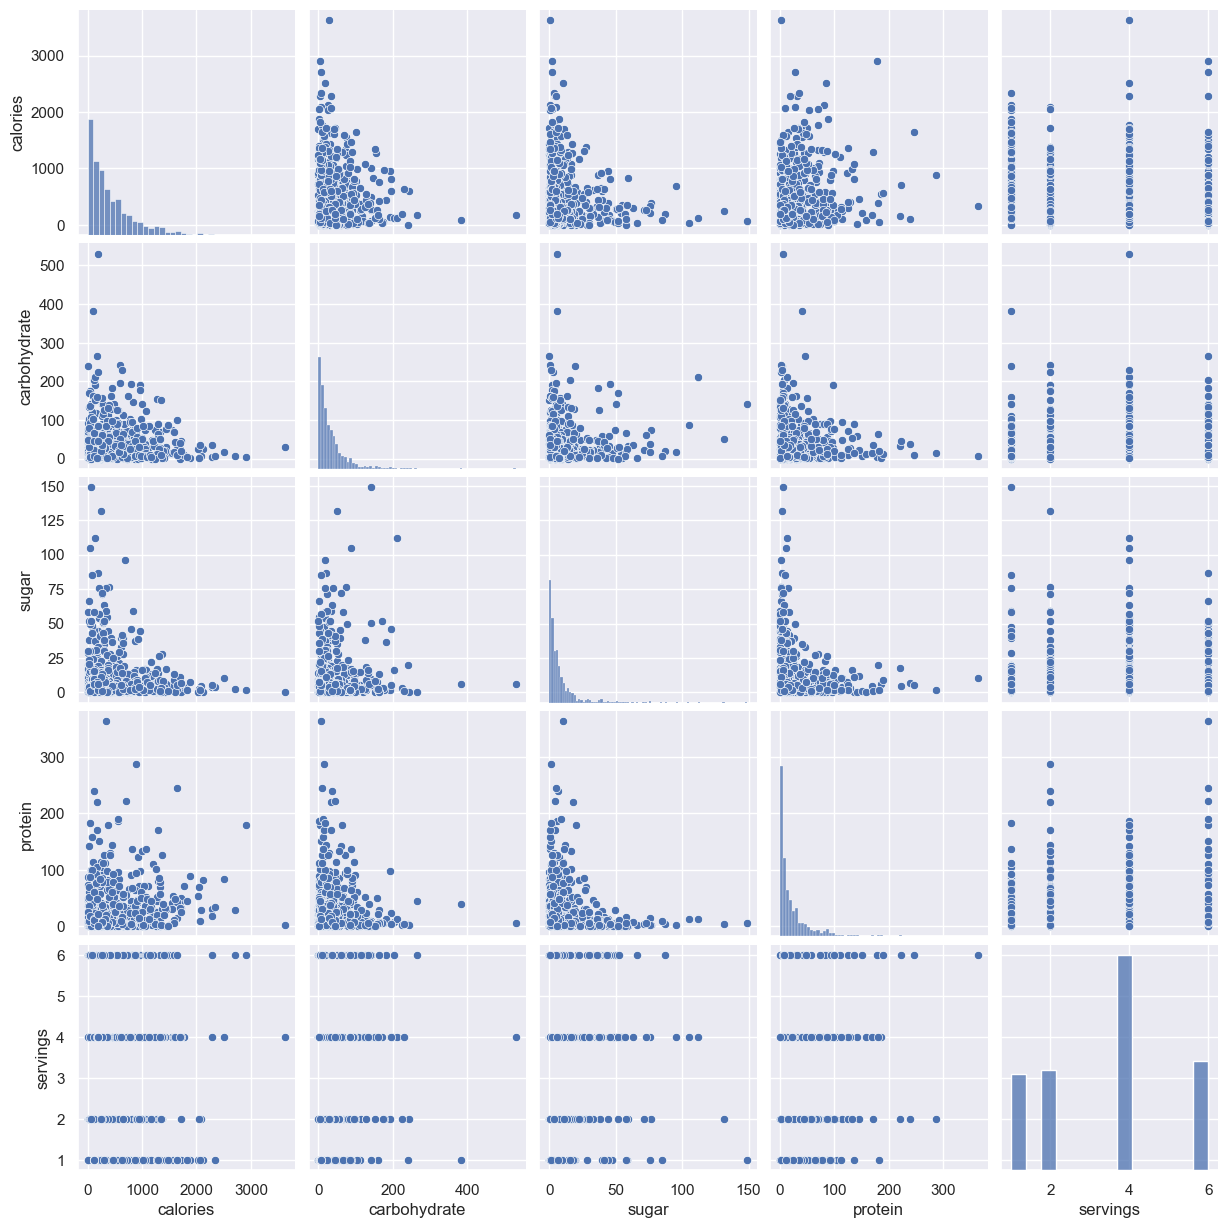

In [129]:
#checking relationship between numeric variables

sns.pairplot(data=clean_recipe)
plt.show()

## Observation

- There is a weak correaltion among numeric variables, this will be verify again using heatmap
- Numeric variables are rightly skewed 

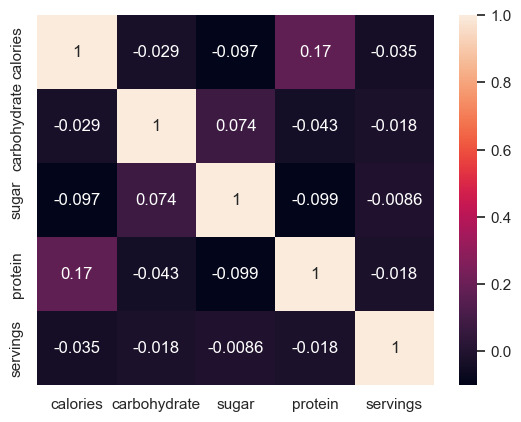

In [130]:
sns.heatmap(clean_recipe.select_dtypes(include='number').corr(), annot=True)
plt.savefig('heatmap.png')
plt.show();

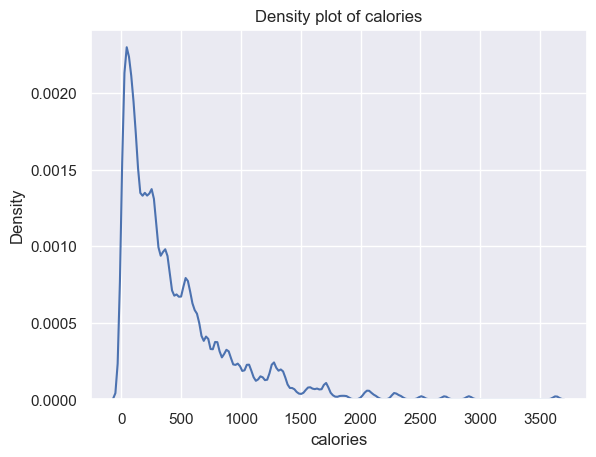

In [131]:
sns.kdeplot(data=clean_recipe, x='calories', bw=0.05)
plt.title('Density plot of calories')
plt.savefig('Density_plot_of_calories.png')
plt.show();

## observations

- Majority of the calories values ranges between 0 to 2000
- The data is rightly skewed
- The data contains outliers

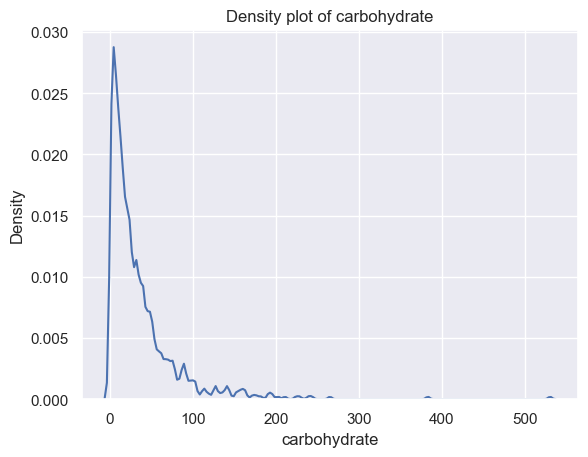

In [132]:
sns.kdeplot(data=clean_recipe, x='carbohydrate', bw=0.05)
plt.title('Density plot of carbohydrate')
plt.show();

## Observations

- The carbohydrate data is rightly skewed
- Majority of the carbohydrate grams values are between 0 to 200
- The data contains outliers

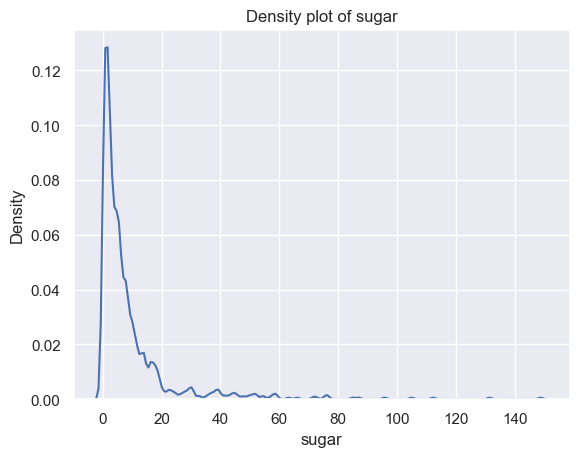

In [133]:
sns.kdeplot(data=clean_recipe, x='sugar', bw=0.05)
plt.title('Density plot of sugar')
plt.show();

## Observations
- The sugar data is rightly skewed
- Sugar values are between 0 to 60
- The data contains outliers

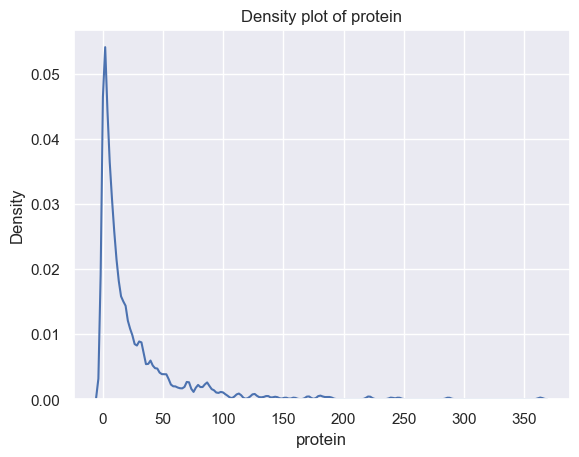

In [134]:
sns.kdeplot(data=clean_recipe, x='protein', bw=0.05)
plt.title('Density plot of protein')
plt.show();

## Observations

- The protein data is rightly skewed
- Most protein values are between 0 to 200
- The data contains outliers

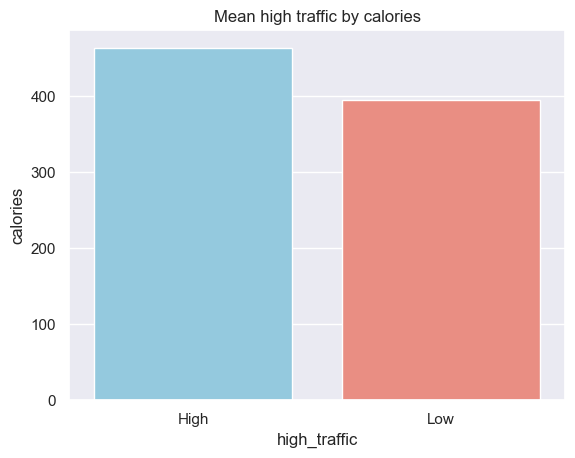

In [135]:
# Checking the distribution of high tarffic by calories
sns.barplot(y='calories', x = 'high_traffic', data = clean_recipe, ci=None, palette=['skyblue', 'salmon'])
plt.title('Mean high traffic by calories')
plt.show();


## Observation

- On an average recipe that derives high traffic contains 480 calories while on an avearge recipe with calories value of about 390 and below will not drive high traffic to the website

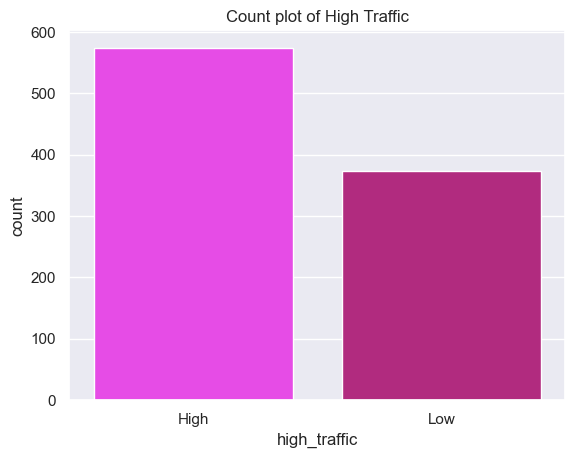

In [136]:
sns.countplot(data = clean_recipe, x='high_traffic', palette=["#FF33FF", "#C71585"])
plt.title("Count plot of High Traffic")
plt.savefig("Count_plot_of_High_Traffic.png")
plt.show();

## Observation

- There are more recipe that drives high compare to the ones that doesn't

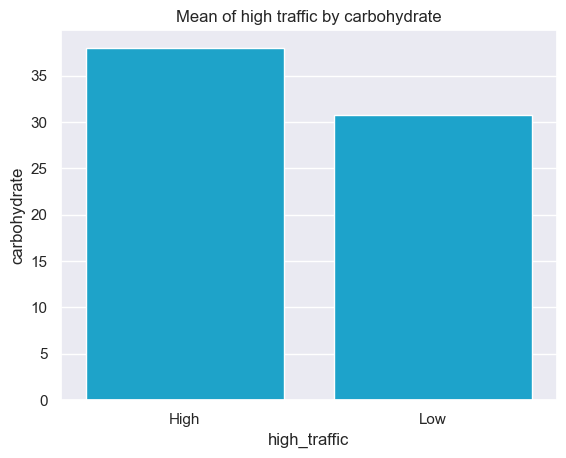

In [137]:
sns.barplot(x='high_traffic', y='carbohydrate', data = clean_recipe, ci = None, palette=["#01B3E6", "#00B3E8"])
plt.title("Mean of high traffic by carbohydrate")
plt.show()

## Observations

recipe that contain an average of approximately 38grams of carbohydrate derives high traffic while recipe with carbohydrate value of approximately 31 grams and below will not drive high traffick to the website

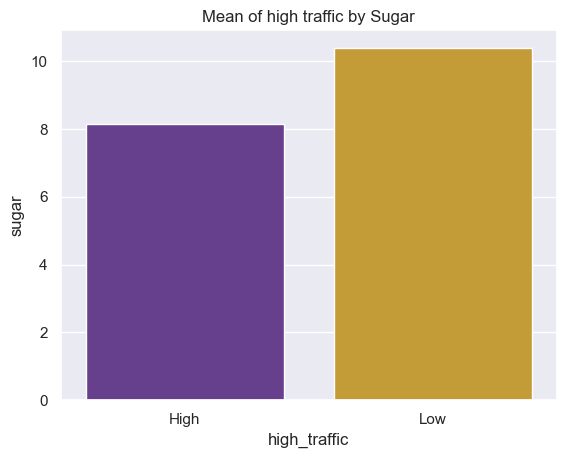

In [138]:
sns.barplot(x='high_traffic', y='sugar', data = clean_recipe, ci = None, palette=["rebeccapurple", "goldenrod"]
)
plt.title("Mean of high traffic by Sugar")
plt.show()

## Observation

On an average sugar values in recipe above approximately 8grams is likely to reduce high traffic in the website

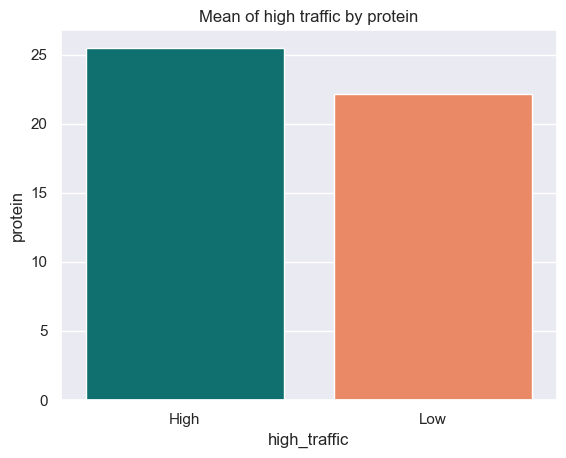

In [139]:
sns.barplot(x='high_traffic', y='protein', data = clean_recipe, ci = None, palette=["teal", "coral"]
)
plt.title("Mean of high traffic by protein")
plt.show()

## Observations 
Recipes that contains an average of 26 grams of protein will drive high traffic to the website while recipes with 22 grams of proteina nd below can cause low traffic on the website

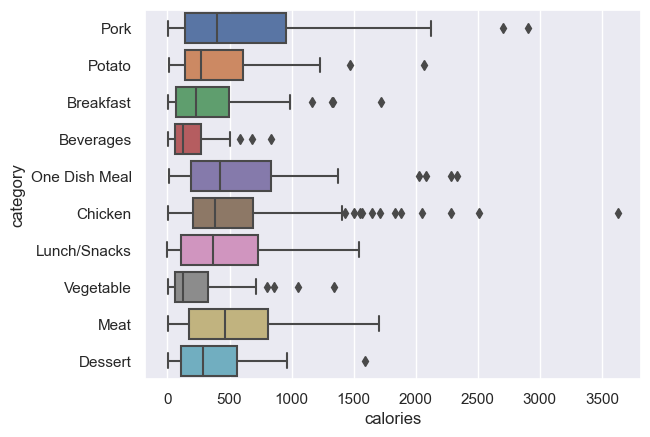

In [140]:
sns.boxplot(data=clean_recipe, x='calories',  y = 'category')
plt.show();

## Observations
Based on the chart "Mean of high_traffic by calories" we see that calories drives high traffic therefore category with high calories will drive high traffic.

Top 5 category that are more likely to drive high traffic base on calories include:

- Pork
- Meat
- Lunch/Snacks
- Chicken
- One Dish Meal

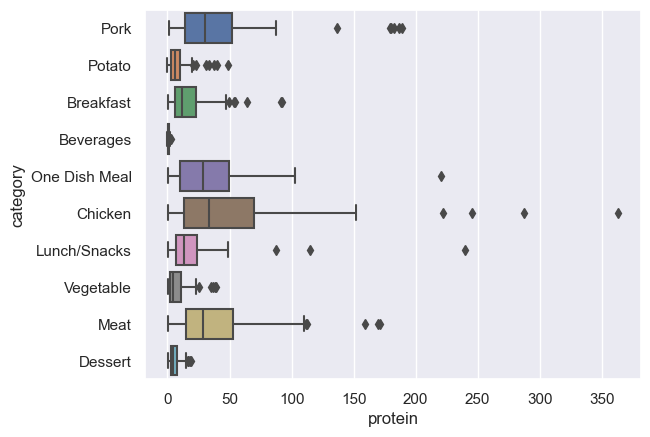

In [141]:
sns.boxplot(data=clean_recipe, x='protein',  y = 'category')

plt.show()

## Observations

Based on the chart "Mean of high_traffic by protein" we see that protein drives high traffic therefore category with high protein will drive high traffic.

Top 5 category that are more likely to drive high traffic base on protein include:

- Chicken
- Meat
- One Dish Meal
- Pork
- Lunch/Snacks

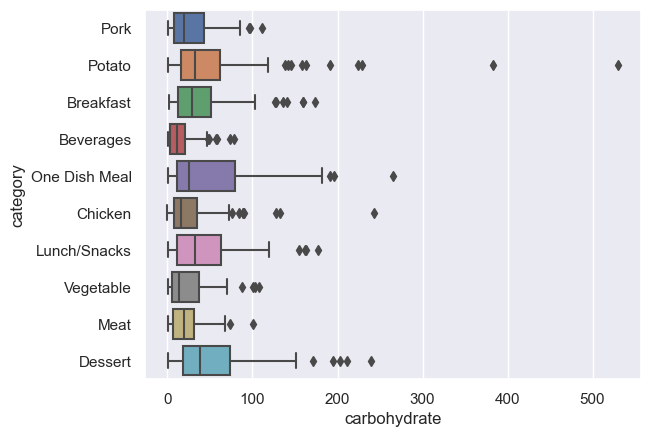

In [142]:
sns.boxplot(data=clean_recipe, x='carbohydrate',  y = 'category')

plt.show()

## Observations

Category like One Dish Meal, Potato, Lunch/Snacks, Dessert and Pork in term of carbohydate will drive high traffic to the site

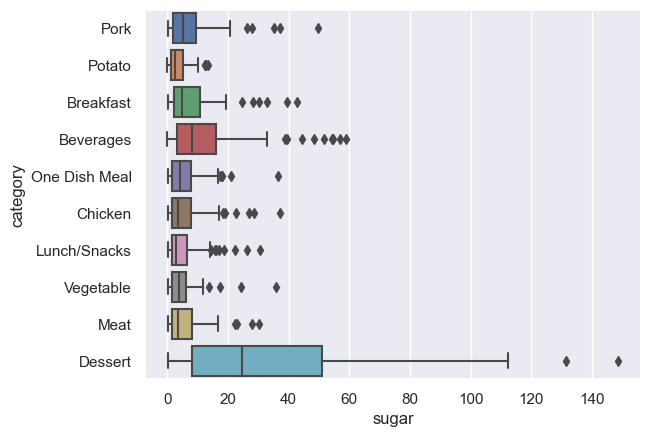

In [143]:
sns.boxplot(data=clean_recipe, x='sugar',  y = 'category')

plt.show()

## Observation

High sugar doesn't drive high traffic and so category like Desert, Beverages, pork  with high sugar grams might not drive trafic to the website

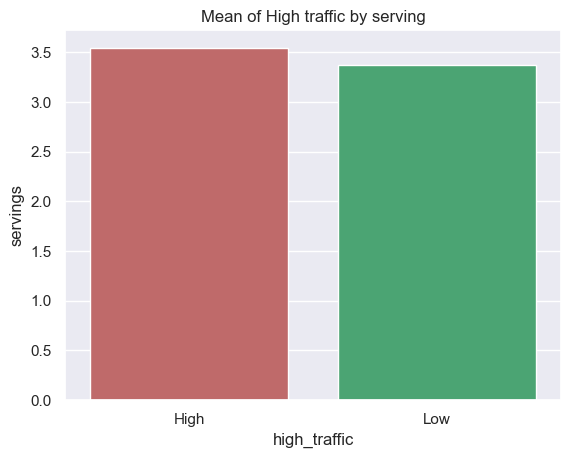

In [144]:
sns.barplot(data=clean_recipe, y='servings', x='high_traffic', ci=None, palette=["indianred", "mediumseagreen"])
plt.title("Mean of High traffic by serving")
plt.show();

## Observation

- recipe that derives high traffic to the website has a mean serving of approximately 3.6, serving below 3.6 might lead to low traffic in the website

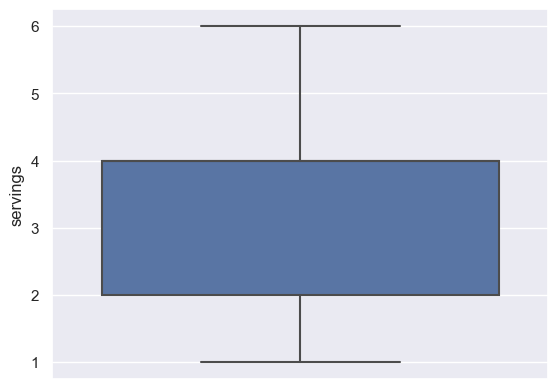

In [145]:
sns.boxplot(data=clean_recipe, y='servings')
plt.savefig('serving.png')
plt.show()

## Observations

- Minimum serving for recipe is 1 and maximum is 6
- Serving column doesn't contain outliers

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Data Preprocessing

- Outliers will be removed from the data, we will keep calories, carbohydrate, protein, sugar with the 95% confidence interval of the data
 
- Categorical variable will be encode into numeric variable using LabelEncoder

- Missing values will be imputed using SimpleImputer
 
- Data will be scaled using StandardScaler

- PCA will be use to decolorate the data
 
- Data will be first split into X, y then split again into train and test set using train_test-split

In [147]:

# Columns needing imputation
columns_to_impute = ['calories', 'carbohydrate', 'protein', 'sugar']

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in specific columns
clean_recipe[columns_to_impute] = imputer.fit_transform(clean_recipe[columns_to_impute])


In [148]:
clean_recipe.isna().sum()

calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [149]:
# Instantiate LabelEncoder
encoder = LabelEncoder()

clean_recipe['category'] = encoder.fit_transform(clean_recipe['category'])

In [150]:

def remove_outliers_custom_quantiles(df, columns):
    """
    Remove outliers from specified columns in a DataFrame using custom percentiles (0.025 and 0.975).
    
    Parameters:
    df (DataFrame): The input DataFrame.
    columns (list): List of columns to remove outliers from.
    
    Returns:
    DataFrame: DataFrame with outliers removed from specified columns.
    """
    df_outliers_removed = df.copy()  # Create a copy of the original DataFrame
    
    for column in columns:
        # Calculate the 2.5th and 97.5th percentiles
        lower_bound = df_outliers_removed[column].quantile(0.025)
        upper_bound = df_outliers_removed[column].quantile(0.975)
        
        # Remove rows where values fall outside the bounds
        df_outliers_removed = df_outliers_removed[(df_outliers_removed[column] >= lower_bound) & (df_outliers_removed[column] <= upper_bound)]
    
    return df_outliers_removed


In [151]:
#columns to remove outliers based on custom quantiles
columns_to_remove_outliers = ['calories', 'sugar', 'protein', 'carbohydrate']

# Remove outliers 
clean_recipe = remove_outliers_custom_quantiles(clean_recipe, columns_to_remove_outliers)


In [152]:
X=clean_recipe.drop('high_traffic', axis=1)
y=clean_recipe['high_traffic']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify =y,
    random_state=42
)

In [153]:
# Instantiate StandardScaler as scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [154]:
#Instantiate PCA 
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## Fitting baseline model

In [155]:
lg_reg = LogisticRegression(random_state=42)
lg_reg.fit(X_train_pca, y_train)
lg_pred = lg_reg.predict(X_test_pca)
lg_accuracy = accuracy_score(y_test, lg_pred)
lg_precision = precision_score(y_test, lg_pred, pos_label= 'High')
lg_recall = recall_score(y_test, lg_pred, pos_label= 'High')

print(f'The LogisticRegression accuracy score is {round(lg_accuracy, 2) * 100}%')
print(f'The LogisticRegression precision score is {round(lg_precision, 2)*100}%')
print(f'The LogisticRegression recall score is {round(lg_recall, 2)*100}%')

The LogisticRegression accuracy score is 74.0%
The LogisticRegression precision score is 80.0%
The LogisticRegression recall score is 77.0%


## Fitting comparison model

In [156]:
from sklearn.ensemble import GradientBoostingClassifier

gb_class = GradientBoostingClassifier(n_estimators=300, random_state=90)
gb_class.fit(X_train_pca, y_train)
gb_pred = gb_class.predict(X_test_pca)

gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred, pos_label='High')
gb_recall = recall_score(y_test, gb_pred, pos_label='High')

print(f'The GradientBoostingClassifier accuracy score is {round(gb_accuracy, 2) * 100}%')
print(f'The GradientBoostingClassifier precision score is {round(gb_precision, 2)*100}%')
print(f'The GradientBoostingClassifier recall score is {round(gb_recall, 2)*100}%')

The GradientBoostingClassifier accuracy score is 68.0%
The GradientBoostingClassifier precision score is 75.0%
The GradientBoostingClassifier recall score is 71.0%


In [157]:

dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=2, random_state=90)
dt.fit(X_train_pca, y_train)
dt_pred = dt.predict(X_test_pca)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, pos_label = 'High')
dt_recall = recall_score(y_test, dt_pred, pos_label='High')

print(f"The DecisionTreeClassifier acuracy score is {round(dt_accuracy, 2) * 100}%")
print(f"The DecisionTreeClassifier precision score is {round(dt_precision, 2) * 100}%")
print(f"The DecisionTreeClassifier recall score is {round(dt_recall, 2) * 100}%")
      

The DecisionTreeClassifier acuracy score is 71.0%
The DecisionTreeClassifier precision score is 77.0%
The DecisionTreeClassifier recall score is 76.0%


In [158]:
rf_class = RandomForestClassifier(
                                max_depth= 5,
                                min_samples_leaf= 1,
                                min_samples_split= 2,
                                n_estimators= 100,
                                random_state=90
)

rf_class.fit(X_train_pca, y_train)
rf_pred = rf_class.predict(X_test_pca)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, pos_label='High')
rf_recall = recall_score(y_test, rf_pred, pos_label='High')

print(f'The RandomForestClassifier accuracy score is {round(rf_accuracy, 2) * 100}%')
print(f'The RandomForestClassifier precision score is {round(rf_precision, 2)*100}%') 
print(f'The RandomForestClassifier recall score is {round(rf_recall, 2)*100}%')

The RandomForestClassifier accuracy score is 76.0%
The RandomForestClassifier precision score is 80.0%
The RandomForestClassifier recall score is 80.0%


In [159]:
# Creating a dataframe for the models
model_eval = pd.DataFrame()
model_eval['model_name'] = ['GradientBoostingClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier']
model_eval['Accuray_score'] = [gb_accuracy, dt_accuracy, rf_accuracy]
model_eval['Precision_score'] = [gb_precision, dt_precision, rf_precision]
model_eval['Recall_score'] = [gb_recall, dt_recall, rf_recall]
model_eval

,model_name,Accuray_score,Precision_score,Recall_score
0,GradientBoostingClassifier,0.677083,0.747748,0.709402
1,DecisionTreeClassifier,0.713542,0.767241,0.760684
2,RandomForestClassifier,0.760417,0.803419,0.803419


Random forest classifier performed better than the other two models so Random classifier will be compared to baseline model

In [160]:
#how the two model compare

model = pd.DataFrame()
model['model_name'] = ["LogisticRegression", "RandomForestClassifier"]
model['Accuracy_score'] = [lg_accuracy, rf_accuracy]
model['Precison_score'] = [lg_precision, rf_precision]
model['Recall_score'] = [lg_recall, rf_recall]

model

,model_name,Accuracy_score,Precison_score,Recall_score
0,LogisticRegression,0.739583,0.796460,0.769231
1,RandomForestClassifier,0.760417,0.803419,0.803419


## Getting Feature importances

In [161]:
# Get feature importances
feature_importances = rf_class.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame(rf_class.feature_importances_, index = X_train.columns)

feature_importance_df.columns = ['Importance']

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Display the DataFrame with feature importances
print(feature_importance_df)


              Importance
sugar           0.079992
category        0.084379
protein         0.085960
servings        0.213062
carbohydrate    0.267273
calories        0.269334


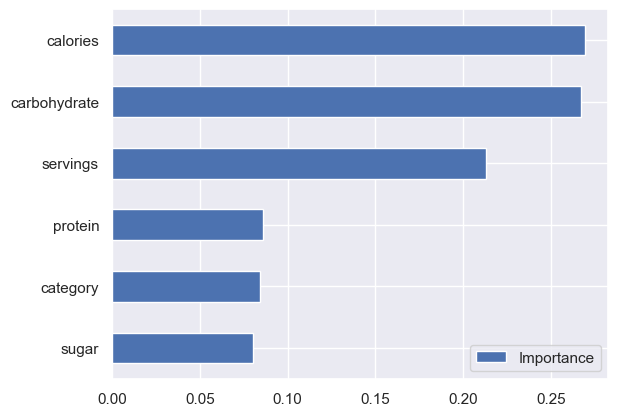

In [162]:
feature_importance_df.plot(kind='barh');